In [9]:
%matplotlib notebook
import lalsimulation,lal
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import time

In [2]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 50.0
m2 = 50.0
phi_c = 0.
f_start22 = 10. #Frequency of the 22 mode at which the signal starts
distance = 500e6
inclination = 0.
spin1_z = 0.
spin2_z =  0.
srate = 4192.
deltaT = 1./srate

domega220, dtau220 = 0., 0.
domega210, dtau210 = 0., 0.
domega330, dtau330 = 0., 0.
domega440, dtau440 = 0., 0.
domega550, dtau550 = 0., 0.

approximant_list = [lalsimulation.SEOBNRv4HM, lalsimulation.SEOBNRv4HM_PA]
label_list = ["ohne PA", "mit PA"]

In [3]:
N = 100

for (label, approximant) in zip(label_list, approximant_list):

    start_time = time.time()
    for idx in range(N):
        
        paramdict = lal.CreateDict()
        lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
        lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
        lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
        lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
        lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
        lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)
        
        hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1*lal.MSUN_SI, m2*lal.MSUN_SI, \
                                                        0., 0., spin1_z, \
                                                        0., 0., spin2_z, \
                                                        distance*lal.PC_SI, \
                                                        inclination, phi_c, \
                                                        0., 0., 0., deltaT, \
                                                        f_start22, f_start22, \
                                                        paramdict, approximant)
    end_time = time.time()
        
    print(f"Average time taken to generate a {m1:.1f} + {m2:.1f} BBH at srate {srate} Hz {label}: {(end_time - start_time)/N} seconds")

Average time taken to generate a 50.0 + 50.0 BBH at srate 4192.0 Hz ohne PA: 0.10900482177734375 seconds
Average time taken to generate a 50.0 + 50.0 BBH at srate 4192.0 Hz mit PA: 0.10324655055999755 seconds


In [7]:
domega220, dtau220 = 0., 0.

paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)

hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1*lal.MSUN_SI, m2*lal.MSUN_SI, \
                                                0., 0., spin1_z, \
                                                0., 0., spin2_z, \
                                                distance*lal.PC_SI, \
                                                inclination, phi_c, \
                                                0., 0., 0., deltaT, \
                                                f_start22, f_start22, \
                                                paramdict, lalsimulation.SEOBNRv4HM_PA)

time_array = np.arange(0,len(hp.data.data)*deltaT,deltaT)

np.savetxt("./hphc_seobnrv4HMPA_padynamics_dsigma_0p0.txt", np.c_[time_array, hp.data.data, hc.data.data])

<IPython.core.display.Javascript object>


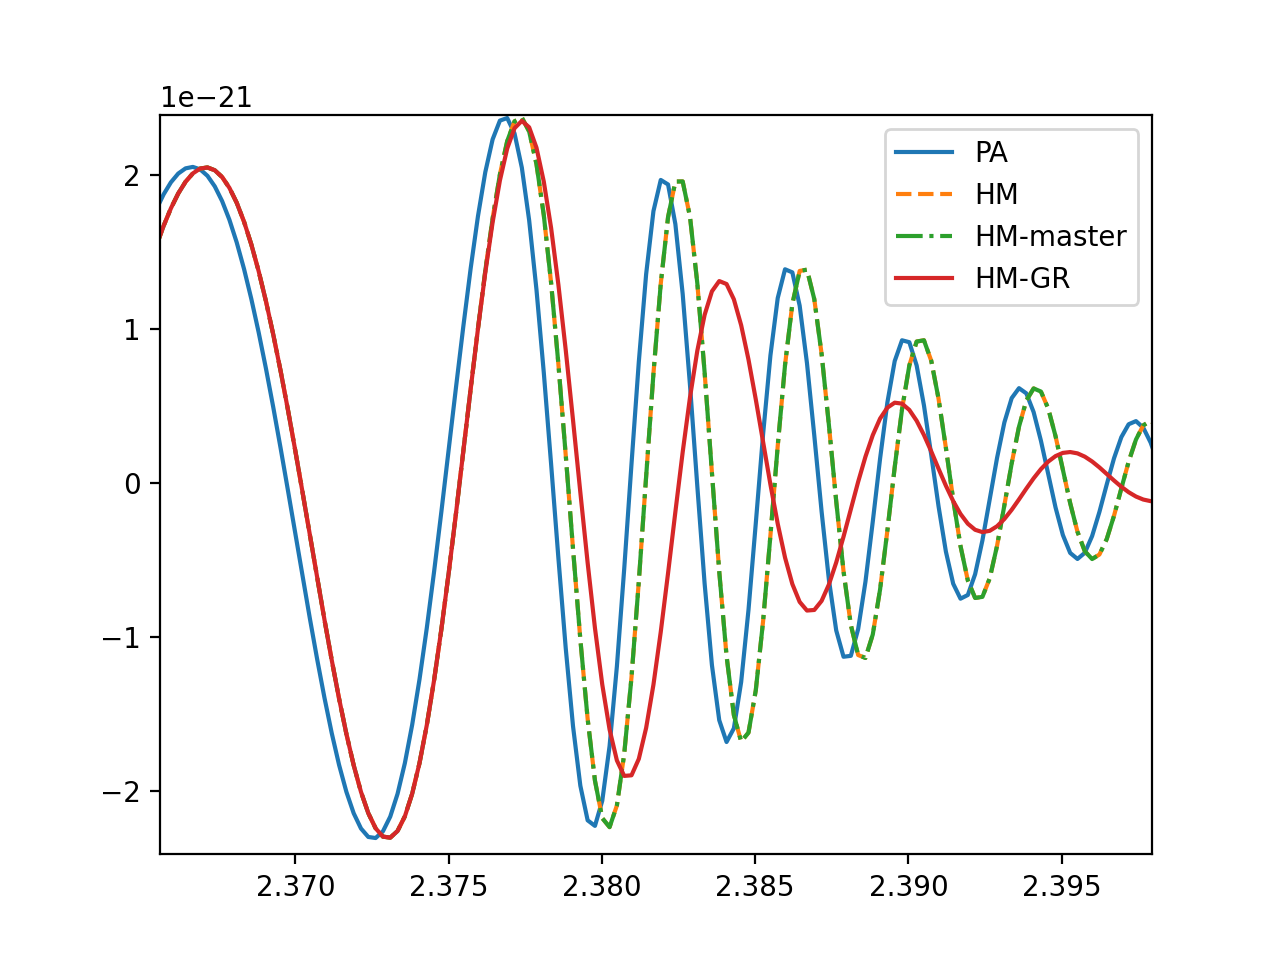

In [15]:
loc_list = ["./hphc_seobnrv4HMPA_padynamics_dsigma_0p5.txt", \
           "./hphc_seobnrv4HM_padynamics_dsigma_0p5.txt", \
           "./hphc_seobnrv4HM_dsigma_0p5.txt", "./hphc_seobnrv4HM_dsigma_0p0.txt"]

label_list = ["PA", "HM", "HM-master", "HM-GR"]
ls_list = ['solid', 'dashed', 'dashdot', 'solid']

fig = plt.figure()
ax = fig.add_subplot(111)

for (ls, label, loc) in zip(ls_list, label_list, loc_list):
    
    t, hp, hc = np.genfromtxt(loc, unpack=True)
    
    ax.plot(t, hp, ls=ls, label=label)
plt.legend(loc='best')
plt.show()    